> ## Import the libraries and read the data

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [8]:
df = pd.read_csv('/kaggle/input/crypto/USDT-USD.csv',index_col = ['Date'], parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-08,1.000260,1.000444,0.999879,1.000097,1.000097,62394894090
2022-01-09,1.000097,1.000314,1.000008,1.000257,1.000257,49109221960
2022-01-10,1.000256,1.000304,1.000020,1.000181,1.000181,68455690767
2022-01-11,1.000179,1.000520,1.000019,1.000362,1.000362,59061400900
2022-01-12,1.000369,1.000713,1.000210,1.000290,1.000290,62300703831


> ## Data Preprocessing, Cleansing, Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-08 to 2023-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


df.isnull()

In [10]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,0.999911,1.000116,0.999575,0.999911,0.999911,5.190642e+10
std,0.000573,0.000559,0.002921,0.000572,0.000572,2.154152e+10
min,0.995879,0.997736,0.948486,0.995872,0.995872,1.107910e+10
25%,0.999727,0.999864,0.999635,0.999734,0.999734,3.908561e+10
50%,1.000072,1.000174,0.999999,1.000075,1.000075,5.051812e+10
75%,1.000261,1.000491,1.000125,1.000269,1.000269,6.313438e+10
max,1.000730,1.002683,1.000545,1.000744,1.000744,1.627349e+11


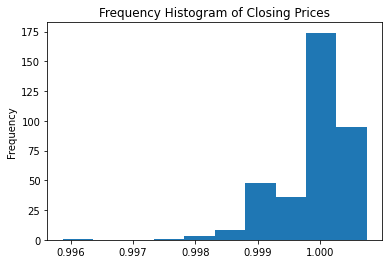

In [12]:
plt.hist(df['Close'], bins=10)
plt.gca().set(title='Frequency Histogram of Closing Prices', ylabel='Frequency')
plt.show()

In [13]:
df[df['Close'] < 20000].count()

Open         366
High         366
Low          366
Close        366
Adj Close    366
Volume       366
dtype: int64

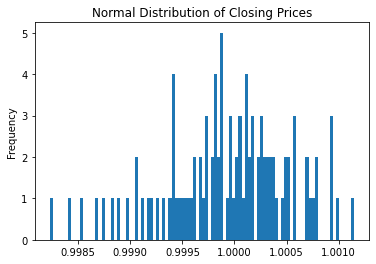

In [14]:
x = np.random.normal(df['Close'].mean(), df['Close'].std(), 100)
plt.gca().set(title='Normal Distribution of Closing Prices', ylabel='Frequency')
plt.hist(x, 100)
plt.show()

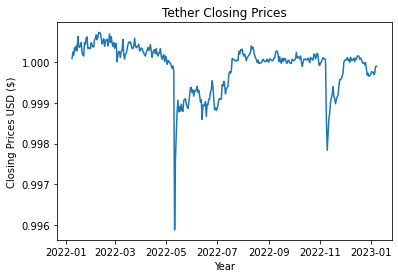

In [15]:
plt.plot(df.index,df['Close'])
plt.gca().set(title='Tether Closing Prices', xlabel='Year', ylabel='Closing Prices USD ($)')
plt.show()

In [16]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = df.index,
                                        open = df["Open"], 
                                        high = df["High"],
                                        low = df["Low"], 
                                        close = df["Close"])])
figure.update_layout(title = "Tether - Candlestick Chart", xaxis_title='Year',yaxis_title='Close Price USD ($)',
                     xaxis_rangeslider_visible = False)
figure.show()

<AxesSubplot:title={'center':'Tether Close Prices'}, xlabel='Date'>

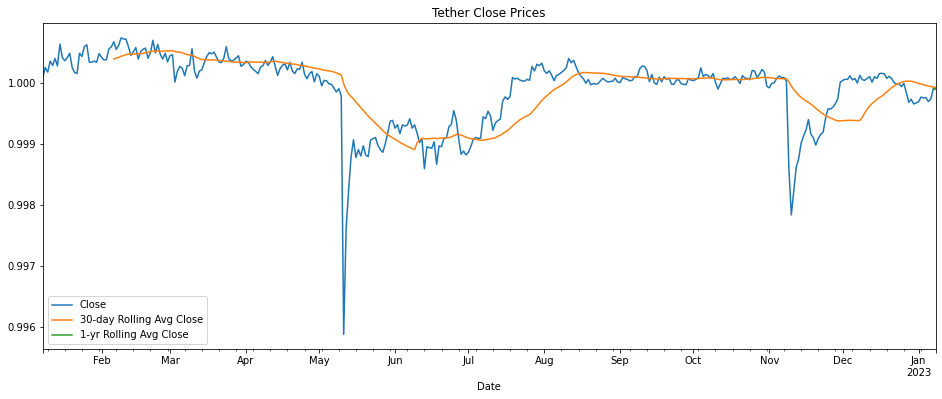

In [17]:
df['Close'].plot(title='Tether Close Prices',label='Close',legend=True)
df.rolling(30).mean()['Close'].plot(figsize=(16,6), label='30-day Rolling Avg Close', legend=True)
df.rolling(365).mean()['Close'].plot(figsize=(16,6), label='1-yr Rolling Avg Close', legend=True)

In [18]:
import plotly.express as px
date_start = '2022-01-01'
date_end = '2023-01-01'
figure = px.line(df, x = df.index, 
                 y = 'Close', 
                 range_x = [date_start,date_end], 
                 title = "Tether Analysis {} to {}".format(date_start, date_end))
figure.show()

<AxesSubplot:title={'center':'Tether Close Prices'}, xlabel='Date'>

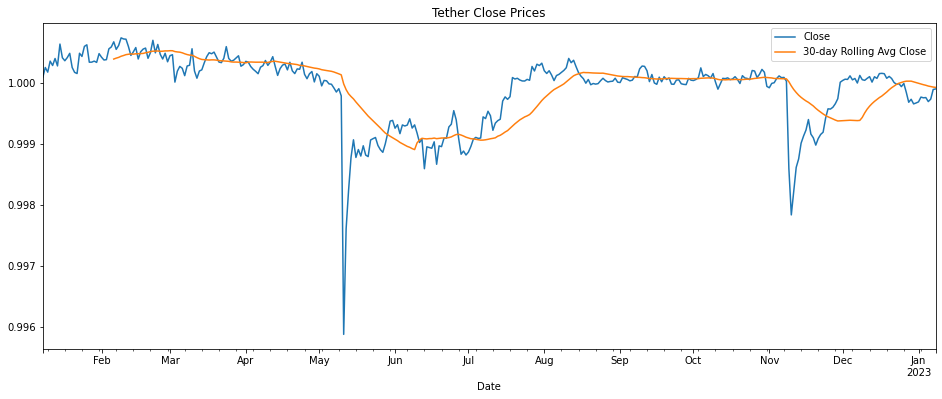

In [19]:
df['Close'].plot(title='Tether Close Prices',label='Close',legend=True)
df.rolling(30).mean()['Close'].plot(figsize=(16,6), label='30-day Rolling Avg Close', legend=True)

In [20]:
df1 = pd.read_csv('/kaggle/input/crypto/USDT-USD.csv')
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1.Date, y=df1.Close, name='Close',  marker_color='Red'))
fig.add_trace(go.Scatter(x=df1.Date, y=df1.Open, name='Open' , marker_color='Green'))
fig.add_trace(go.Scatter(x=df1.Date, y=df1.High, mode='lines', name='High', marker_color='Yellow')) 
fig.add_trace(go.Scatter(x=df1.Date, y=df1.Low, name='Low', marker_color='Violet') )

fig.show()

In [21]:
data = pd.read_csv('/kaggle/input/crypto/USDT-USD.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [22]:
from itertools import cycle
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(data, x=data.Date, y=[data['Open'], data['Close'], 
                                          data['High'], data['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [23]:
monthvise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1.000213,1.000221
February,1.000544,1.000538
March,1.000342,1.000341
April,1.000245,1.000242
May,0.999162,0.999135
June,0.999130,0.999112
July,0.999637,0.999687
August,1.000130,1.000121
September,1.000069,1.000073


In [24]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = data.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [25]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = data.groupby(data['Date'].dt.strftime('%B'))['Open'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = data.groupby(data['Date'].dt.strftime('%B'))['Close'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock open Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock close Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise open and close stock price')
fig.show()

> ## Train - Test Split

In [26]:
import math

#Only using the prices from the Close column in our dataset
close_prices = df.filter(['Close'])

close_price_df = close_prices.values

training_len = math.ceil(len(close_price_df) * 0.80)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(close_price_df)

In [28]:
train_data = scaled_data[0: training_len, :]

In [29]:
x_train = [] 
y_train = [] 

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i,0]) 

In [30]:
print('Length of list (y_train): ', len(y_train))
print('The type of this: ',type(y_train))

Length of list (y_train):  233
The type of this:  <class 'list'>


In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

> ## Building the LSTM Model

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) 
model.summary()

2023-01-10 06:36:40.660577: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=100)

2023-01-10 06:36:43.152711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
233/233 [==============================] - 8s 19ms/step - loss: 0.0222
Epoch 2/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0084
Epoch 3/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0079
Epoch 4/100
233/233 [==============================] - 5s 21ms/step - loss: 0.0072
Epoch 5/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0074
Epoch 6/100
233/233 [==============================] - 5s 19ms/step - loss: 0.0060
Epoch 7/100
233/233 [==============================] - 5s 20ms/step - loss: 0.0066
Epoch 8/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0066
Epoch 9/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0058
Epoch 10/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0064
Epoch 11/100
233/233 [==============================] - 5s 21ms/step - loss: 0.0054
Epoch 12/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0057
E

In [35]:
test_data = scaled_data[training_len-60:,:]

x_test = []

y_test = close_price_df[training_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

> ## Predict the model

In [36]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
predictions[:5]


array([[1.0000769],
       [1.0001472],
       [1.0002083],
       [1.0001532],
       [0.9999306]], dtype=float32)

> ## RMSE

In [37]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(rmse)

0.00021678855025227637


> ## Visualizing Predictions Vs Actuals

In [38]:
data  = df.filter(['Close'])

train = data[:training_len]
valuation = data[training_len:]

valuation['Predictions'] = predictions

valuation.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predictions
Date,,
2022-10-28,1.000146,1.000077
2022-10-29,1.000226,1.000147
2022-10-30,1.000179,1.000208
2022-10-31,0.999947,1.000153
2022-11-01,0.999924,0.999931


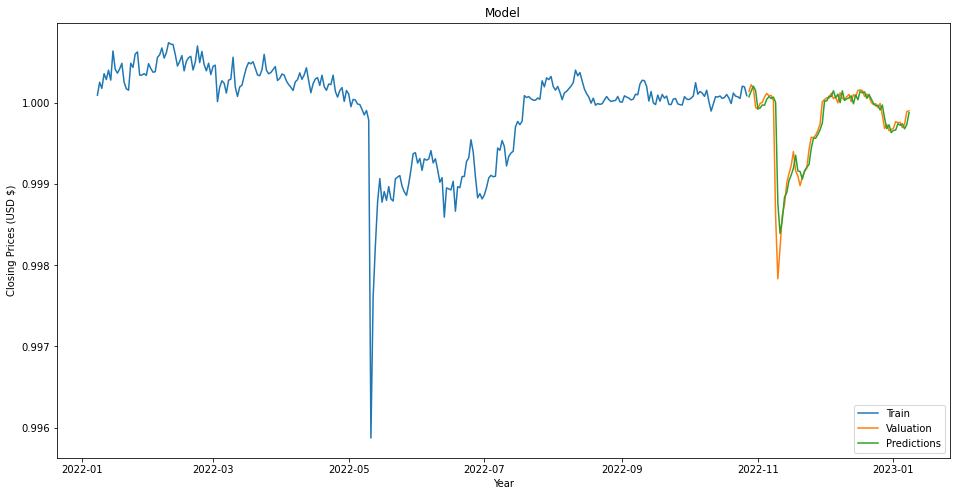

In [39]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Year')
plt.ylabel('Closing Prices (USD $)')
plt.plot(train)

plt.plot(valuation[['Close','Predictions']])
plt.legend(['Train','Valuation','Predictions'], loc='lower right')
plt.show()

> ## Training and Predicting Using Random Forest

In [40]:
df = pd.read_csv('/kaggle/input/crypto/USDT-USD.csv',index_col = ['Date'], parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-08,1.000260,1.000444,0.999879,1.000097,1.000097,62394894090
2022-01-09,1.000097,1.000314,1.000008,1.000257,1.000257,49109221960
2022-01-10,1.000256,1.000304,1.000020,1.000181,1.000181,68455690767
2022-01-11,1.000179,1.000520,1.000019,1.000362,1.000362,59061400900
2022-01-12,1.000369,1.000713,1.000210,1.000290,1.000290,62300703831


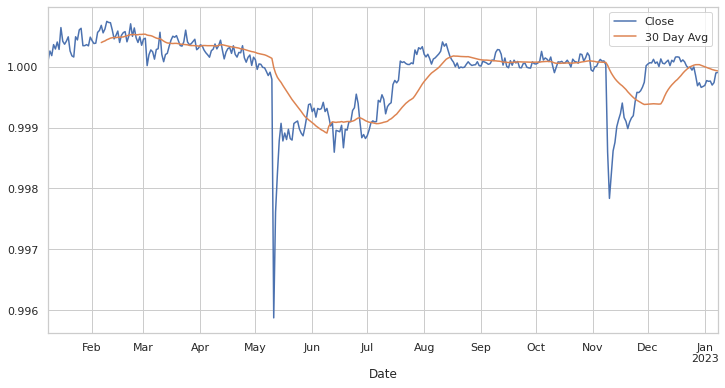

In [41]:
# Plotting the rolling 30 day average against the Close Price
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12,6),label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [42]:
df['ohlc_average'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

In [43]:
df['Price_After_Month']=df['Close'].shift(-30)

In [44]:
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)
y=df['Price_After_Month']

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=101)

In [50]:
preds = reg.predict(X_test)

In [51]:
preds = reg.predict(X_test)

In [52]:
X_30=X[-30:]
forecast=reg.predict(X_30)

In [53]:
from datetime import datetime, timedelta
last_date=df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df=df.append(df1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ohlc_average,Price_After_Month,Forecast
2022-01-08,1.000260,1.000444,0.999879,1.000097,1.000097,6.239489e+10,1.000170,1.000555,NaN
2022-01-09,1.000097,1.000314,1.000008,1.000257,1.000257,4.910922e+10,1.000169,1.000619,NaN
2022-01-10,1.000256,1.000304,1.000020,1.000181,1.000181,6.845569e+10,1.000190,1.000744,NaN
2022-01-11,1.000179,1.000520,1.000019,1.000362,1.000362,5.906140e+10,1.000270,1.000726,NaN
2022-01-12,1.000369,1.000713,1.000210,1.000290,1.000290,6.230070e+10,1.000395,1.000722,NaN


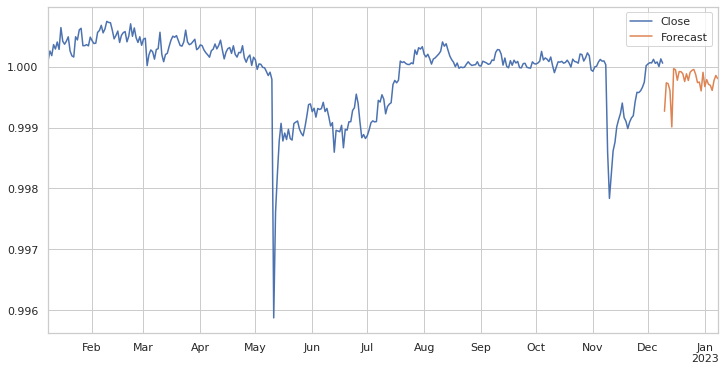

In [54]:
df['Close'].plot(figsize=(12,6),label='Close')
df['Forecast'].plot()
plt.legend()